#1. Load Dataset

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##1.1 Recipes Main Dataset

###The Recipe datset is collected from RecipeBox. https://eightportions.com/datasets/Recipes/#fn:1  
###It contains 125,000 recipes from various food websites.

In [ ]:
df_ar = pd.read_json('/content/drive/MyDrive/my_data/recipes_raw/recipes_raw_nosource_ar.json',orient='index')

In [ ]:
df_ar.head()

,title,ingredients,instructions,picture_link
rmK12Uau.ntP510KeImX506H6Mr6jTu,Slow Cooker Chicken and Dumplings,"[4 skinless, boneless chicken breast halves AD...","Place the chicken, butter, soup, and onion in ...",55lznCYBbs2mT8BTx6BTkLhynGHzM.S
5ZpZE8hSVdPk2ZXo1mZTyoPWJRSCPSm,Awesome Slow Cooker Pot Roast,[2 (10.75 ounce) cans condensed cream of mushr...,"In a slow cooker, mix cream of mushroom soup, ...",QyrvGdGNMBA2lDdciY0FjKu.77MM0Oe
clyYQv.CplpwJtjNaFGhx0VilNYqRxu,Brown Sugar Meatloaf,"[1/2 cup packed brown sugar ADVERTISEMENT, 1/2...",Preheat oven to 350 degrees F (175 degrees C)....,LVW1DI0vtlCrpAhNSEQysE9i/7rJG56
BmqFAmCrDHiKNwX.IQzb0U/v0mLlxFu,Best Chocolate Chip Cookies,"[1 cup butter, softened ADVERTISEMENT, 1 cup w...",Preheat oven to 350 degrees F (175 degrees C)....,0SO5kdWOV94j6EfAVwMMYRM3yNN8eRi
N.jCksRjB4MFwbgPFQU8Kg.yF.XCtOi,Homemade Mac and Cheese Casserole,[8 ounces whole wheat rotini pasta ADVERTISEME...,Preheat oven to 350 degrees F. Line a 2-quart ...,YCnbhplMgiraW4rUXcybgSEZinSgljm


In [ ]:
df_ar.shape # The dataset contains 4 rows and 39802 columns.

(39522, 4)

In [ ]:
df_epi = pd.read_json('/content/drive/MyDrive/my_data/recipes_raw/recipes_raw_nosource_epi.json',orient='index')

In [ ]:
df_epi.head()

,ingredients,picture_link,instructions,title
05zEpbSqcs9E0rcnCJWyZ9OgdH0MLby,"[12 egg whites, 12 egg yolks, 1 1/2 cups sugar...",None,"Beat the egg whites until stiff, gradually add...",Christmas Eggnog
mF5SZmoqxF4WtIlhLRvzuKk.z6s7P2S,"[18 fresh chestnuts, 2 1/2 pounds veal stew me...",None,Preheat oven to 400°F. Using small sharp knife...,"Veal, Carrot and Chestnut Ragoût"
oQV5D7cVbCFwmrDs3pBUv2y.AG0WV26,"[2 tablespoons unsalted butter, softened, 4 or...",3xjktRst3I5lDZ2Z5kTOtqQyzZFFN9u,Preheat the oven to 350°F. Spread the softened...,Caramelized Bread Pudding with Chocolate and C...
Z9seBJWaB5NkSp4DQHDnCAUBTwov/1u,"[3/4 pound Stilton, crumbled (about 3 cups) an...",None,"In a food processor blend the Stilton, the cre...",Sherried Stilton and Green Peppercorn Spread
bB3GxoAplVZeoX3fzWNWyeECtQFxw6G,"[2 cups (about 9 1/2 ounces) whole almonds, to...",None,Position rack in center of oven and preheat to...,Almond-Chocolate Macaroons


In [ ]:
df_fn = pd.read_json('/content/drive/MyDrive/my_data/recipes_raw/recipes_raw_nosource_fn.json',orient='index')

In [ ]:
df_fn.head()

,instructions,ingredients,title,picture_link
p3pKOD6jIHEcjf20CCXohP8uqkG5dGi,Toss ingredients lightly and spoon into a butt...,"[1/2 cup celery, finely chopped, 1 small green...",Grammie Hamblet's Deviled Crab,None
S7aeOIrsrgT0jLP32jKGg4j.o9zi2DO,Watch how to make this recipe.\nSprinkle the s...,"[2 pounds skirt steak, cut into 1/2-inch dice,...",Infineon Raceway Baked Beans,Ja5uaD8Q7m7vvtWwk2.48dr1eCre/qi
o9MItV9txfoPsUQ4v8b0vh1.VdjwfsK,"In a large saucepan, let the beans soak in eno...","[1 1/2 cups dried black beans, picked over and...",Southwestern Black Bean Dip,None
5l1yTSYFifF/M2dfbD6DX28WWQpLWNK,Watch how to make this recipe.\nPreheat the ov...,"[1 1/4 pounds ground chuck, One 15-ounce can t...",Sour Cream Noodle Bake,nm/WxalB.VjEZSa0iX9RuZ8xI51Y7bS
kRBQSWtqYWqtkb34FGeenBSbC32gIdO,Special equipment: sushi mat\nCook the brown r...,"[1 cup rice, brown, medium-grain, cooked, 1/2-...",Sushi Renovation,None


In [ ]:
    data =  pd.concat([df_ar,df_epi, df_fn])
    data = data.reset_index()
    data = data.drop(columns=['picture_link', 'index'])

In [ ]:
data

,title,ingredients,instructions
0,Slow Cooker Chicken and Dumplings,"[4 skinless, boneless chicken breast halves AD...","Place the chicken, butter, soup, and onion in ..."
1,Awesome Slow Cooker Pot Roast,[2 (10.75 ounce) cans condensed cream of mushr...,"In a slow cooker, mix cream of mushroom soup, ..."
2,Brown Sugar Meatloaf,"[1/2 cup packed brown sugar ADVERTISEMENT, 1/2...",Preheat oven to 350 degrees F (175 degrees C)....
3,Best Chocolate Chip Cookies,"[1 cup butter, softened ADVERTISEMENT, 1 cup w...",Preheat oven to 350 degrees F (175 degrees C)....
4,Homemade Mac and Cheese Casserole,[8 ounces whole wheat rotini pasta ADVERTISEME...,Preheat oven to 350 degrees F. Line a 2-quart ...
...,...,...,...
124642,Summer Corn Salad,"[4 ears fresh corn, 2 heads Belgian endive, 2 ...",Watch how to make this recipe.\nPreheat a gril...
124643,Zucchini Stuffed Tomatoes,"[4 large plum tomatoes, Salt and sugar, 1 1/2 ...",Preheat the broiler. Cut the tomatoes in 1/2 c...
124644,Pepper Pasta Quick Cook,"[3 tablespoons olive oil, 2 tablespoons unsalt...",Heat the oil and butter in a large skillet ove...
124645,Chocolate Cake with Armagnac Ice Cream,"[8 ounces butter, 8 ounces bittersweet chocola...",Preheat oven to 350 degrees. On the top half o...


In [ ]:
data.head(4)

,title,ingredients,instructions
0,Slow Cooker Chicken and Dumplings,"[4 skinless, boneless chicken breast halves AD...","Place the chicken, butter, soup, and onion in ..."
1,Awesome Slow Cooker Pot Roast,[2 (10.75 ounce) cans condensed cream of mushr...,"In a slow cooker, mix cream of mushroom soup, ..."
2,Brown Sugar Meatloaf,"[1/2 cup packed brown sugar ADVERTISEMENT, 1/2...",Preheat oven to 350 degrees F (175 degrees C)....
3,Best Chocolate Chip Cookies,"[1 cup butter, softened ADVERTISEMENT, 1 cup w...",Preheat oven to 350 degrees F (175 degrees C)....


In [ ]:
data.shape

(124647, 3)

##Remove Null rows

In [ ]:
data.isnull().sum()

title            52
ingredients       0
instructions    174
dtype: int64

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.isnull().sum()

title           0
ingredients     0
instructions    0
dtype: int64

##1.2 Load Cuisine and ingredients Dataset

In [ ]:
df_incredients_train = pd.read_json('/content/drive/MyDrive/my_data/ingredients/train.json')

In [ ]:
df_incredients_train.head()

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


In [ ]:
df_incredients_train.shape

#The Train datset contains 39774 rows and three features.
#The features includes id,cuisine and ingredients.

(39774, 3)

In [ ]:
df_incredients_test = pd.read_json('/content/drive/MyDrive/my_data/ingredients/test.json')

In [ ]:
df_incredients_test.head()

,id,ingredients
0,18009,"[baking powder, eggs, all-purpose flour, raisi..."
1,28583,"[sugar, egg yolks, corn starch, cream of tarta..."
2,41580,"[sausage links, fennel bulb, fronds, olive oil..."
3,29752,"[meat cuts, file powder, smoked sausage, okra,..."
4,35687,"[ground black pepper, salt, sausage casings, l..."


In [ ]:
df_incredients_test.shape
#The Train datset contains upto 10000 rows and two features.
#The features includes id and ingredients.

(9944, 2)

In [ ]:
df_ingredients = pd.concat([df_incredients_train,df_incredients_test],axis=0)

In [ ]:
df_ingredients.head()

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


In [ ]:
df_ingredients.shape

(49718, 3)

#2. Feature Engineering

In [ ]:
import nltk
import re
import pandas as pd
from sklearn import feature_extraction, model_selection, pipeline, manifold, preprocessing,feature_selection

In [ ]:
additional_stop_words = ["advertisement", "advertisements",'ADVERTISEMENT'
                         "cup", "cups",
                         "tablespoon", "tablespoons", 
                         "teaspoon", "teaspoons", 
                         "ounce", "ounces",
                         "salt", 
                         "pepper", 
                         "pound", "pounds",
                         ]

nltk.download('wordnet')
nltk.download("stopwords")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
def preprocess_text(text, flg_stemm=False, flg_lemm=True, lst_stopwords=None):
    ## clean (convert to lowercase and remove punctuations and characters and then strip)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
            
    ## Tokenize (convert from string to list)
    lst_text = text.split()

    ## remove Stopwords
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in 
                    lst_stopwords]
                
    ## Stemming (remove -ing, -ly, ...)
    if flg_stemm == True:
        ps = nltk.stem.porter.PorterStemmer()
        lst_text = [ps.stem(word) for word in lst_text]
                
    ## Lemmatisation (convert the word into root word)
    if flg_lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in lst_text]
            
    ## back to string from list
    text = " ".join(lst_text)

    ## Remove digits
    text = ''.join([i for i in text if not i.isdigit()])

    ## remove mutliple space
    text = re.sub(' +', ' ', text)

    return text


In [ ]:
def processing(row):
  ls = row['ingredients']
  return ' '.join(ls)

In [ ]:
dataset_cuisine_ingredients = df_ingredients



In [ ]:
dataset_cuisine_ingredients['ingredients'] = dataset_cuisine_ingredients.apply(lambda x: processing(x), axis=1)

In [ ]:
dataset_cuisine_ingredients.head()

,id,cuisine,ingredients
0,10259,greek,romaine lettuce black olives grape tomatoes ga...
1,25693,southern_us,plain flour ground pepper salt tomatoes ground...
2,20130,filipino,eggs pepper salt mayonaise cooking oil green c...
3,22213,indian,water vegetable oil wheat salt
4,13162,indian,black pepper shallots cornflour cayenne pepper...


In [ ]:
dataset_cuisine_ingredients.dropna(inplace=True)
dataset_cuisine_ingredients = dataset_cuisine_ingredients.drop(columns=['id']).reset_index(drop=True)

In [ ]:
dataset_cuisine_ingredients.head()

,cuisine,ingredients
0,greek,romaine lettuce black olives grape tomatoes ga...
1,southern_us,plain flour ground pepper salt tomatoes ground...
2,filipino,eggs pepper salt mayonaise cooking oil green c...
3,indian,water vegetable oil wheat salt
4,indian,black pepper shallots cornflour cayenne pepper...


In [ ]:
    stop_word_list = nltk.corpus.stopwords.words("english")

    # Extend list of stop words
    stop_word_list.extend(additional_stop_words)


In [ ]:
 dataset_cuisine_ingredients["ingredients_query"] = dataset_cuisine_ingredients["ingredients"].apply(lambda x: preprocess_text(x, flg_stemm=False, flg_lemm=True, lst_stopwords=stop_word_list))

In [ ]:
dataset_cuisine_ingredients.head()

,cuisine,ingredients,ingredients_query
0,greek,romaine lettuce black olives grape tomatoes ga...,romaine lettuce black olive grape tomato garli...
1,southern_us,plain flour ground pepper salt tomatoes ground...,plain flour ground tomato ground black thyme e...
2,filipino,eggs pepper salt mayonaise cooking oil green c...,egg mayonaise cooking oil green chilies grille...
3,indian,water vegetable oil wheat salt,water vegetable oil wheat
4,indian,black pepper shallots cornflour cayenne pepper...,black shallot cornflour cayenne onion garlic p...


In [ ]:
dataset_cuisine_ingredients['ingredients_query'][0]

'romaine lettuce black olive grape tomato garlic purple onion seasoning garbanzo bean feta cheese crumbles'

In [ ]:
#dataset_cuisine_ingredients.to_csv('dataset_cuisine_ingredients.csv',index=False)

In [ ]:
 ## Tf-Idf (advanced variant of BoW)
vectorizer = feature_extraction.text.TfidfVectorizer(max_features=10000, ngram_range=(1,2))
corpus = dataset_cuisine_ingredients["ingredients_query"]
vectorizer.fit(corpus)

TfidfVectorizer(max_features=10000, ngram_range=(1, 2))

In [ ]:
embedded_ingredients = vectorizer.transform(corpus)

In [ ]:
    
    dic_vocabulary = vectorizer.vocabulary_

In [ ]:
dic_vocabulary

{'romaine': 7325,
 'lettuce': 4810,
 'black': 587,
 'olive': 5835,
 'grape': 3919,
 'tomato': 8998,
 'garlic': 3608,
 'purple': 7000,
 'onion': 5866,
 'seasoning': 7771,
 'garbanzo': 3603,
 'bean': 314,
 'feta': 3168,
 'cheese': 1502,
 'crumbles': 2629,
 'romaine lettuce': 7326,
 'black olive': 681,
 'grape tomato': 3921,
 'tomato garlic': 9060,
 'garlic purple': 3728,
 'purple onion': 7001,
 'onion seasoning': 6055,
 'garbanzo bean': 3604,
 'feta cheese': 3169,
 'cheese crumbles': 1549,
 'plain': 6669,
 'flour': 3304,
 'ground': 4000,
 'thyme': 8910,
 'egg': 2920,
 'green': 3952,
 'yellow': 9879,
 'corn': 2406,
 'meal': 5063,
 'milk': 5122,
 'vegetable': 9334,
 'oil': 5533,
 'plain flour': 6672,
 'flour ground': 3364,
 'ground tomato': 4049,
 'tomato ground': 9065,
 'ground black': 4005,
 'black thyme': 721,
 'thyme egg': 8928,
 'egg green': 2978,
 'green tomato': 3989,
 'tomato yellow': 9143,
 'yellow corn': 9882,
 'corn meal': 2431,
 'meal milk': 5067,
 'milk vegetable': 5228,
 'veg

In [ ]:
## Chi squarred correlation embeddings reduction
labels = dataset_cuisine_ingredients["cuisine"]
labels

0              greek
1        southern_us
2           filipino
3             indian
4             indian
            ...     
39769          irish
39770        italian
39771          irish
39772        chinese
39773        mexican
Name: cuisine, Length: 39774, dtype: object

In [ ]:
names = vectorizer.get_feature_names()
names[0:5]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['achiote', 'achiote paste', 'acorn', 'acorn squash', 'active']

In [ ]:
    p_value_limit = 0.95
    dtf_features = pd.DataFrame()

In [ ]:
for cat in np.unique(labels):
        chi2, p = feature_selection.chi2(embedded_ingredients, labels==cat)
        dtf_features = dtf_features.append(pd.DataFrame(
                       {"feature":names, "score":1-p, "labels":cat}))
        dtf_features = dtf_features.sort_values(["labels","score"], 
                        ascending=[True,False])
        dtf_features = dtf_features[dtf_features["score"]>p_value_limit]

In [ ]:
dtf_features.head()

,feature,score,labels
54,almond milk,1.0,brazilian
170,açai,1.0,brazilian
1069,butter chocolate,1.0,brazilian
1242,cachaca,1.0,brazilian
1243,cachaca lime,1.0,brazilian


In [ ]:
  names = dtf_features["feature"].unique().tolist()

In [ ]:
names[0:5]

['almond milk', 'açai', 'butter chocolate', 'cachaca', 'cachaca lime']

In [ ]:
    ## Check the main ingredients
    for cat in np.unique(labels):
        print("# {}:".format(cat))
        print("  . selected features:",len(dtf_features[dtf_features["labels"]==cat]))
        print("  . top features:", ",".join(dtf_features[dtf_features["labels"]==cat]["feature"].values[:10]))
    

# brazilian:
  . selected features: 242
  . top features: almond milk,açai,butter chocolate,cachaca,cachaca lime,chocolate sprinkle,coconut,condensed,condensed milk,crushed ice
# british:
  . selected features: 510
  . top features: beef dripping,currant,double,double cream,dripping,flour beef,golden syrup,haddock,haddock fillet,jam
# cajun_creole:
  . selected features: 767
  . top features: andouille,andouille sausage,bay,bay leaf,bell,bell bay,bell cajun,bell creole,broth cajun,butter creole
# chinese:
  . selected features: 1286
  . top features: bamboo,bamboo shoot,bean paste,bean sauce,black vinegar,bok,bok choy,broccoli,broccoli floret,chestnut
# filipino:
  . selected features: 437
  . top features: annatto,belly,belly garlic,calamansi,calamansi juice,coconut,cooking oil,glutinous,glutinous rice,jackfruit
# french:
  . selected features: 952
  . top features: butter,calvados,chocolate,cognac,crème,crème fraîche,de provence,dijon,dijon mustard,duck
# greek:
  . selected features

In [ ]:
    ## New embeddings
    vectorizer = feature_extraction.text.TfidfVectorizer(vocabulary=names)
    vectorizer.fit(corpus)
    embedded_ingredients = vectorizer.transform(corpus)
    dic_vocabulary = vectorizer.vocabulary_


In [ ]:
dic_vocabulary

{'almond milk': 0,
 'açai': 1,
 'butter chocolate': 2,
 'cachaca': 3,
 'cachaca lime': 4,
 'chocolate sprinkle': 5,
 'coconut': 6,
 'condensed': 7,
 'condensed milk': 8,
 'crushed ice': 9,
 'dried black': 10,
 'frozen banana': 11,
 'granola': 12,
 'heart palm': 13,
 'ice': 14,
 'ice lime': 15,
 'lime cachaca': 16,
 'lime ice': 17,
 'lime sugar': 18,
 'manioc': 19,
 'manioc flour': 20,
 'palm oil': 21,
 'passion': 22,
 'passion fruit': 23,
 'powder sweetened': 24,
 'sprinkle': 25,
 'sugar cachaca': 26,
 'sugar ice': 27,
 'sugar sweetened': 28,
 'superfine': 29,
 'superfine sugar': 30,
 'sweetened': 31,
 'sweetened condensed': 32,
 'tapioca': 33,
 'tapioca flour': 34,
 'water sweetened': 35,
 'egg grating': 36,
 'simple': 37,
 'simple syrup': 38,
 'frozen strawberry': 39,
 'orange slice': 40,
 'fruit': 41,
 'coconut sweetened': 42,
 'shredded coconut': 43,
 'milk': 44,
 'tapioca starch': 45,
 'palm': 46,
 'ice cube': 47,
 'banana': 48,
 'lime': 49,
 'stock coconut': 50,
 'coconut milk': 

##Recipe Main Dataset Feature Engineering

In [ ]:
 # list of stopwords
stop_word_list = nltk.corpus.stopwords.words("english")

# Extend list of stop words
stop_word_list.extend(additional_stop_words)

data["ingredients_query"] = data["ingredients"].apply(lambda x: preprocess_text(x, flg_stemm=False, flg_lemm=True, lst_stopwords=stop_word_list))

In [ ]:
data.head()

,title,ingredients,instructions,ingredients_query
0,Slow Cooker Chicken and Dumplings,"[4 skinless, boneless chicken breast halves AD...","Place the chicken, butter, soup, and onion in ...",skinless boneless chicken breast half butter ...
1,Awesome Slow Cooker Pot Roast,[2 (10.75 ounce) cans condensed cream of mushr...,"In a slow cooker, mix cream of mushroom soup, ...",can condensed cream mushroom soup package dry...
2,Brown Sugar Meatloaf,"[1/2 cup packed brown sugar ADVERTISEMENT, 1/2...",Preheat oven to 350 degrees F (175 degrees C)....,packed brown sugar ketchup lean ground beef m...
3,Best Chocolate Chip Cookies,"[1 cup butter, softened ADVERTISEMENT, 1 cup w...",Preheat oven to 350 degrees F (175 degrees C)....,butter softened white sugar packed brown suga...
4,Homemade Mac and Cheese Casserole,[8 ounces whole wheat rotini pasta ADVERTISEME...,Preheat oven to 350 degrees F. Line a 2-quart ...,whole wheat rotini pasta fresh broccoli flore...


#Modelling

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics
from sklearn import utils
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import pickle
import os

In [ ]:
MODEL_PATH = "models/nlp"
MODEL_EMBEDDINGS_PATH = os.path.join(MODEL_PATH, 'similarity_embeddings')
CUISINE_CLASSES = ['brazilian','british','cajun_creole','chinese','filipino','french','greek','indian','irish','italian','jamaican','japanese','korean','mexican','moroccan','russian','southern_us','spanish','thai','vietnamese']
os.makedirs(MODEL_PATH, exist_ok=True)
os.makedirs(MODEL_EMBEDDINGS_PATH, exist_ok=True)

In [ ]:
df_cuisine_ingredients = dataset_cuisine_ingredients

In [ ]:
df_cuisine_ingredients.head()

,cuisine,ingredients,ingredients_query
0,greek,romaine lettuce black olives grape tomatoes ga...,romaine lettuce black olive grape tomato garli...
1,southern_us,plain flour ground pepper salt tomatoes ground...,plain flour ground tomato ground black thyme e...
2,filipino,eggs pepper salt mayonaise cooking oil green c...,egg mayonaise cooking oil green chilies grille...
3,indian,water vegetable oil wheat salt,water vegetable oil wheat
4,indian,black pepper shallots cornflour cayenne pepper...,black shallot cornflour cayenne onion garlic p...


In [ ]:
vectorizer = feature_extraction.text.TfidfVectorizer()

In [ ]:
## Model
classifier = LogisticRegressionCV(cv=3,random_state=42,
                                      max_iter=300,
                                      n_jobs=-1,
                                      verbose=1) #naive_bayes.MultinomialNB()




In [ ]:
## pipeline
model = pipeline.Pipeline([("vectorizer", vectorizer),  
                                ("classifier", classifier)])

In [ ]:
## Split the dataset
df_cuisine_ingredients_train, df_cuisine_ingredients_test = model_selection.train_test_split(df_cuisine_ingredients, test_size=0.3, random_state=42)

In [ ]:
 X_train = df_cuisine_ingredients_train['ingredients_query']; 
 X_test = df_cuisine_ingredients_test['ingredients_query'];

In [ ]:
y_train = df_cuisine_ingredients_train['cuisine']; 
y_test = df_cuisine_ingredients_test['cuisine']; 

In [ ]:
  ## train classifier
  model.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  3.1min finished


Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier',
                 LogisticRegressionCV(cv=3, max_iter=300, n_jobs=-1,
                                      random_state=42, verbose=1))])

In [ ]:
predicted = model.predict(X_test)

In [ ]:
predicted

array(['chinese', 'spanish', 'greek', ..., 'indian', 'french', 'mexican'],
      dtype=object)

In [ ]:
predicted_prob = model.predict_proba(X_test)
predicted_prob

array([[6.30620428e-05, 1.27005272e-04, 2.18292261e-04, ...,
        9.37993983e-05, 7.29817813e-04, 6.09101707e-03],
       [1.05972193e-03, 1.92034972e-03, 3.17051553e-03, ...,
        8.04669476e-01, 3.01986105e-04, 9.21427683e-04],
       [2.11311261e-03, 1.65459231e-04, 1.68084195e-03, ...,
        1.25435314e-02, 3.55839424e-05, 7.83748465e-05],
       ...,
       [3.64937666e-05, 1.30768240e-05, 5.10291680e-05, ...,
        2.29560263e-05, 1.36590374e-04, 8.90600035e-04],
       [1.53866858e-02, 6.40917162e-02, 3.44317007e-02, ...,
        4.95750414e-02, 5.79542466e-03, 1.31975179e-03],
       [2.28400598e-02, 7.67801416e-04, 1.18746111e-02, ...,
        1.52378867e-02, 1.95027975e-04, 2.44837636e-04]])

In [ ]:
classes = np.unique(y_test)
classes

array(['brazilian', 'british', 'cajun_creole', 'chinese', 'filipino',
       'french', 'greek', 'indian', 'irish', 'italian', 'jamaican',
       'japanese', 'korean', 'mexican', 'moroccan', 'russian',
       'southern_us', 'spanish', 'thai', 'vietnamese'], dtype=object)

##Accuracy

In [ ]:
accuracy = metrics.accuracy_score(y_test, predicted)
accuracy

0.7885695131148914

##Confusion matrix

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
 cm = metrics.confusion_matrix(y_test, predicted)
 

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5]),
 <a list of 20 Text major ticklabel objects>)

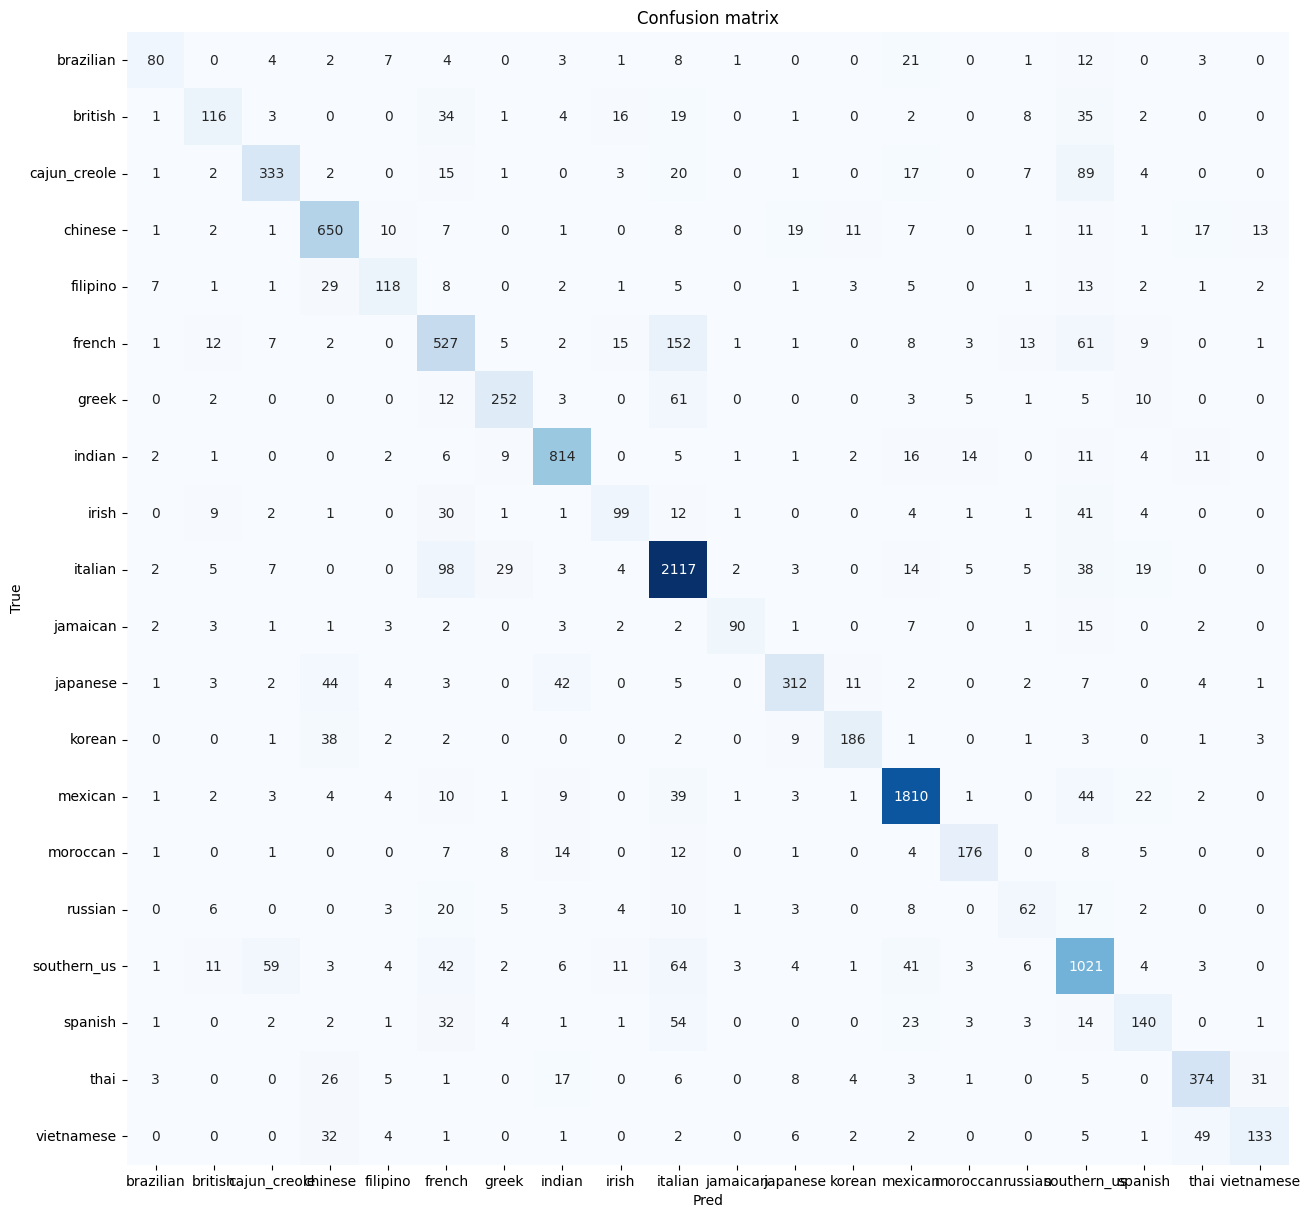

In [ ]:
fig, ax = plt.subplots(figsize=(15,15), dpi=100)
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
                cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
           yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)

In [ ]:
## Save to file in the current working directory
def save_pkl(file, pkl_filename):
    with open(pkl_filename, 'wb') as pkl_file:
        pickle.dump(file, pkl_file)

In [ ]:
save_pkl(model, os.path.join(MODEL_PATH, "pickle_model.pkl"))


In [ ]:
def load_pkl(pkl_filename):
    with open(pkl_filename, 'rb') as pkl_file:
        return pickle.load(pkl_file)
        

In [ ]:
df_main_recipe = data

In [ ]:
model = load_pkl(os.path.join(MODEL_PATH, 'pickle_model.pkl'))
df_main_recipe["cuisine"] = model.predict(data["ingredients_query"].tolist())

In [ ]:
df_main_recipe[0:5]

,title,ingredients,instructions,ingredients_query,cuisine
0,Slow Cooker Chicken and Dumplings,"[4 skinless, boneless chicken breast halves AD...","Place the chicken, butter, soup, and onion in ...",skinless boneless chicken breast half butter ...,southern_us
1,Awesome Slow Cooker Pot Roast,[2 (10.75 ounce) cans condensed cream of mushr...,"In a slow cooker, mix cream of mushroom soup, ...",can condensed cream mushroom soup package dry...,italian
2,Brown Sugar Meatloaf,"[1/2 cup packed brown sugar ADVERTISEMENT, 1/2...",Preheat oven to 350 degrees F (175 degrees C)....,packed brown sugar ketchup lean ground beef m...,southern_us
3,Best Chocolate Chip Cookies,"[1 cup butter, softened ADVERTISEMENT, 1 cup w...",Preheat oven to 350 degrees F (175 degrees C)....,butter softened white sugar packed brown suga...,southern_us
4,Homemade Mac and Cheese Casserole,[8 ounces whole wheat rotini pasta ADVERTISEME...,Preheat oven to 350 degrees F. Line a 2-quart ...,whole wheat rotini pasta fresh broccoli flore...,italian


In [ ]:

def d2v_embeddings(data):
    data = data['ingredients_query'].tolist()
    tagged_data = [TaggedDocument(words=row.split(), tags=[str(index)]) for index, row in enumerate(data)]

    max_epochs = 20
    vec_size = 50
    alpha = 0.025

    model_embedding = Doc2Vec(size=vec_size,
                        alpha=alpha, 
                        min_alpha=0.00025,
                        min_count=1,
                        dm =1)
  
    model_embedding.build_vocab(tagged_data)

    for epoch in range(max_epochs):
        print('iteration {0}'.format(epoch))
        model_embedding.train(tagged_data,
                    total_examples=model_embedding.corpus_count,
                    epochs=model_embedding.iter)
        # decrease the learning rate
        model_embedding.alpha -= 0.0002
        # fix the learning rate, no decay
        model_embedding.min_alpha = model_embedding.alpha
    
    return model_embedding

In [ ]:
data.iloc[:,0:4]

,title,ingredients,instructions,ingredients_query
0,Slow Cooker Chicken and Dumplings,"[4 skinless, boneless chicken breast halves AD...","Place the chicken, butter, soup, and onion in ...",skinless boneless chicken breast half butter ...
1,Awesome Slow Cooker Pot Roast,[2 (10.75 ounce) cans condensed cream of mushr...,"In a slow cooker, mix cream of mushroom soup, ...",can condensed cream mushroom soup package dry...
2,Brown Sugar Meatloaf,"[1/2 cup packed brown sugar ADVERTISEMENT, 1/2...",Preheat oven to 350 degrees F (175 degrees C)....,packed brown sugar ketchup lean ground beef m...
3,Best Chocolate Chip Cookies,"[1 cup butter, softened ADVERTISEMENT, 1 cup w...",Preheat oven to 350 degrees F (175 degrees C)....,butter softened white sugar packed brown suga...
4,Homemade Mac and Cheese Casserole,[8 ounces whole wheat rotini pasta ADVERTISEME...,Preheat oven to 350 degrees F. Line a 2-quart ...,whole wheat rotini pasta fresh broccoli flore...
...,...,...,...,...
124642,Summer Corn Salad,"[4 ears fresh corn, 2 heads Belgian endive, 2 ...",Watch how to make this recipe.\nPreheat a gril...,ear fresh corn head belgian endive olive oil ...
124643,Zucchini Stuffed Tomatoes,"[4 large plum tomatoes, Salt and sugar, 1 1/2 ...",Preheat the broiler. Cut the tomatoes in 1/2 c...,large plum tomato sugar zucchini shallot slic...
124644,Pepper Pasta Quick Cook,"[3 tablespoons olive oil, 2 tablespoons unsalt...",Heat the oil and butter in a large skillet ove...,olive oil unsalted butter medium clove garlic...
124645,Chocolate Cake with Armagnac Ice Cream,"[8 ounces butter, 8 ounces bittersweet chocola...",Preheat oven to 350 degrees. On the top half o...,butter bittersweet chocolate whole egg egg yo...


In [ ]:
 for cuisine in CUISINE_CLASSES:
        data_cuisine = data[data['cuisine'] == cuisine]
        print(data_cuisine.iloc[:,0:4])
        model_embedding = d2v_embeddings(data_cuisine.iloc[:,0:4])
        save_pkl(model_embedding, os.path.join(MODEL_EMBEDDINGS_PATH, f'd2v_{cuisine}.pkl'))   



                                         title  ...                                  ingredients_query
454                                      Fudge  ...   semisweet chocolate chip sweetened condensed ...
971                          Easy Granola Bars  ...   quickcooking oat sweetened condensed milk but...
2621                   Cookies 'n' Creme Fudge  ...   package white chocolate baking square eagle b...
2772                                Brigadeiro  ...   unsweetened cocoa butter sweetened condensed ...
4426    Brazilian Cheese Bread (Pao de Queijo)  ...   olive oil butter water milk soy milk tapioca ...
...                                        ...  ...                                                ...
123423                   Mango Lime Caipirinha  ...   lime sugar ounce bottle mango nectar ice cach...
123578                       Coconut Macaroons  ...   sweetened shredded coconut sweetened condense...
123870                      Paradise Macaroons  ...   ounce package sweet

/usr/local/lib/python3.7/dist-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


iteration 0
iteration 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).


iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
                                                    title  ...                                  ingredients_query
5                                     Banana Banana Bread  ...   allpurpose flour baking soda butter brown sug...
59                                    Creamy Rice Pudding  ...   uncooked white rice milk divided white sugar ...
62                                          Easy Meatloaf  ...   ground beef egg onion chopped milk dried brea...
72                          Slow Cooker Beef Stroganoff I  ...   cubed beef stew meat condensed golden mushroo...
201                              Grandma Johnson's Scones  ...   sour cream baking soda allpurpose flour white...
...                                                   ...  ...                            

/usr/local/lib/python3.7/dist-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


iteration 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).


iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
                                        title  ...                                  ingredients_query
74      Roast Sticky Chicken-Rotisserie Style  ...   paprika onion powder dried thyme white cayenn...
135                 Spicy Garlic Lime Chicken  ...   black cayenne paprika garlic powder onion pow...
160                       Cajun Chicken Pasta  ...   linguine pasta boneless skinless chicken brea...
182         Creamy Chicken and Wild Rice Soup  ...   chicken broth water cooked boneless chicken b...
220           Colleen's Slow Cooker Jambalaya  ...   skinless boneless chicken breast half cut inc...
...                                       ...  ...                                                ...
124421                                  Gumbo  .

/usr/local/lib/python3.7/dist-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


iteration 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).


iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
                                                    title  ...                                  ingredients_query
86                        Sweet, Sticky and Spicy Chicken  ...   brown sugar honey soy sauce chopped fresh gin...
130                                       Szechwan Shrimp  ...   water ketchup soy sauce cornstarch honey crus...
194                             Caramelized Baked Chicken  ...   chicken wing olive oil soy sauce ketchup hone...
250                                   Asian Lettuce Wraps  ...   boston bibb butter lettuce leaf lean ground b...
300                          Tangy Slow Cooker Pork Roast  ...   large onion sliced boneless pork loin roast h...
...                                                   ...  ...                

/usr/local/lib/python3.7/dist-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


iteration 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).


iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
                                             title  ...                                  ingredients_query
32                          Baked Teriyaki Chicken  ...   cornstarch cold water white sugar soy sauce c...
68                                    Maple Salmon  ...   maple syrup soy sauce clove garlic minced gar...
261        Broccoli with Garlic Butter and Cashews  ...   fresh broccoli cut bite size piece butter bro...
301                    Easy Garlic Broiled Chicken  ...   butter minced garlic soy sauce black dried pa...
398                               Cabbage Rolls II  ...   leaf cabbage cooked white rice egg beaten mil...
...                                            ...  ...                                                ...
122678       

/usr/local/lib/python3.7/dist-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


iteration 0
iteration 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).


iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
                                             title  ...                                  ingredients_query
6                      Chef John's Fisherman's Pie  ...  potato crust russet potato peeled cut chunk bu...
11      Best Big, Fat, Chewy Chocolate Chip Cookie  ...   allpurpose flour baking soda unsalted butter ...
13                                 Irish Lamb Stew  ...   thickly sliced bacon diced boneless lamb shou...
30                          Chicken Cordon Bleu II  ...   skinless boneless chicken breast half slice s...
63          Annie's Fruit Salsa and Cinnamon Chips  ...   kiwi peeled diced golden delicious apple peel...
...                                            ...  ...                                                ...
124618                   

/usr/local/lib/python3.7/dist-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


iteration 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).


iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
                                        title  ...                                  ingredients_query
249                                Hummus III  ...   canned garbanzo bean drained tahini lemon jui...
254                                   Baklava  ...   package phyllo dough chopped nut butter groun...
257     Homestyle Turkey, the Michigander Way  ...   whole turkey butter divided warm water chicke...
470       Slow Cooker Lemon Garlic Chicken II  ...   dried oregano ground black skinless boneless ...
487         Sean's Falafel and Cucumber Sauce  ...  sauce container plain yogurt cucumber peeled s...
...                                       ...  ...                                                ...
124263       Lemon Grass Spiced Poached Pears  .

/usr/local/lib/python3.7/dist-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


iteration 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).


iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
                                     title  ...                                  ingredients_query
105                Curried Coconut Chicken  ...   boneless skinless chicken breast cut inch chu...
158                   Chicken Tikka Masala  ...   yogurt lemon juice ground cumin ground cinnam...
223                 Honey Baked Chicken II  ...   whole chicken cut piece butter melted honey p...
265               Simple Whole Wheat Bread  ...   warm water degree f degree c package active d...
467                       Vegetarian Korma  ...   vegetable oil small onion diced minced fresh ...
...                                    ...  ...                                                ...
124366                        Lentil Cakes  ...   vegetable oil divid

/usr/local/lib/python3.7/dist-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


iteration 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).


iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
                                              title  ...                                  ingredients_query
12            Aimee's Mashed Cauliflower 'Potatoes'  ...   cauliflower floret mashed potato flake lowfat...
19                                 Irish Soda Bread  ...   white sugar allpurpose flour baking powder ba...
25                    Bailey's Irish Cream Brownies  ...   package fudge brownie mix duncan hines irish ...
41                          Big Soft Ginger Cookies  ...   allpurpose flour ground ginger baking soda gr...
50                        Creamy Au Gratin Potatoes  ...   russet potato sliced inch slice onion sliced ...
...                                             ...  ...                                                ...
124105

/usr/local/lib/python3.7/dist-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


iteration 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).


iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
                                                    title  ...                                  ingredients_query
1                           Awesome Slow Cooker Pot Roast  ...   can condensed cream mushroom soup package dry...
4                       Homemade Mac and Cheese Casserole  ...   whole wheat rotini pasta fresh broccoli flore...
7                                    Mom's Zucchini Bread  ...   allpurpose flour baking soda baking powder gr...
15                               Broiled Tilapia Parmesan  ...   parmesan cheese butter softened mayonnaise fr...
17                                   World's Best Lasagna  ...   sweet italian sausage lean ground beef minced...
...                                                   ...  ...                

/usr/local/lib/python3.7/dist-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


iteration 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).


iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
                                    title  ...                                  ingredients_query
151                      Pumpkin Pancakes  ...   milk pumpkin puree egg vegetable oil vinegar ...
449                   Pumpkin Gingerbread  ...   sugar vegetable oil egg water pumpkin puree g...
754          Simple Whole Roasted Chicken  ...   white sugar ground clove ground allspice grou...
1141                   Jay's Jerk Chicken  ...   green onion chopped onion chopped jalapeno se...
1150                   Pumpkin Muffins II  ...   small sugar pumpkin seeded allpurpose flour w...
...                                   ...  ...                                                ...
123705                 Jerk Chicken Wings  ...   chicken wing wing disjointe

/usr/local/lib/python3.7/dist-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


iteration 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).


iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
                                                    title  ...                                  ingredients_query
52                                       Grilled Salmon I  ...   salmon fillet lemon taste garlic powder taste...
153                            Marinated Baked Pork Chops  ...   soy sauce vegetable oil worcestershire sauce ...
179                               Ginger Glazed Mahi Mahi  ...   honey soy sauce balsamic vinegar grated fresh...
486                                Japanese Chicken Wings  ...   chicken wing egg lightly beaten allpurpose fl...
573                           Fried Rice Restaurant Style  ...   enriched white rice water chopped baby carrot...
...                                                   ...  ...                

/usr/local/lib/python3.7/dist-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


iteration 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).


iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
                                                    title  ...                                  ingredients_query
809                                           Sesame Beef  ...   round steak soy sauce white sugar vegetable o...
1009                                         Beef Bulgogi  ...   flank steak thinly sliced soy sauce white sug...
1578               Maple-Garlic Marinated Pork Tenderloin  ...   dijon mustard sesame oil clove garlic minced ...
2515        Rib Eye Steaks with a Soy and Ginger Marinade  ...   soy sauce real maple syrup clove garlic mince...
2663                         Candied Garlic Chicken Wings  ...   honey soy sauce clove garlic minced chicken wing
...                                                   ...  ...                

/usr/local/lib/python3.7/dist-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


iteration 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).


iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
                                      title  ...                                  ingredients_query
33                                Guacamole  ...   avocado peeled pitted mashed lime juiced dice...
34               Boilermaker Tailgate Chili  ...   ground beef chuck bulk italian sausage can ch...
37            Slow Cooker Chicken Taco Soup  ...   onion chopped chili bean black bean whole ker...
43                         Taco Seasoning I  ...   chili powder garlic powder onion powder crush...
54                            Salsa Chicken  ...   skinless boneless chicken breast half taco se...
...                                     ...  ...                                                ...
124624  Tostadas de Tuetano Marrow Tostadas  ...   tomatillo h

/usr/local/lib/python3.7/dist-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


iteration 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).


iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
                                                    title  ...                                  ingredients_query
1874                     Spinach and Leek White Bean Soup  ...   olive oil leek bulb chopped clove garlic chop...
1939                  Moroccan-Style Stuffed Acorn Squash  ...   brown sugar butter melted large acorn squash ...
1940                                    Roasted Chickpeas  ...   chickpea garbanzo bean drained olive oil opti...
2551                  Grilled Lamb with Brown Sugar Glaze  ...   brown sugar ground ginger dried tarragon grou...
2674                                     Moroccan Chicken  ...   skinless boneless chicken breast meat cubed o...
...                                                   ...  ...                

/usr/local/lib/python3.7/dist-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


iteration 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).


iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
                                        title  ...                                  ingredients_query
40                  Janet's Rich Banana Bread  ...   butter melted white sugar egg vanilla extract...
77            Jamie's Cranberry Spinach Salad  ...   butter almond blanched slivered spinach rinse...
346                   Hungarian Mushroom Soup  ...   unsalted butter chopped onion fresh mushroom ...
483                         Ranch Dressing II  ...   mayonnaise sour cream dried chive dried parsl...
545                Day Before Mashed Potatoes  ...   potato peeled cubed cream cheese sour cream o...
...                                       ...  ...                                                ...
123973  Iceberg Lettuce with Russian Dressing  .

/usr/local/lib/python3.7/dist-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


iteration 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).


iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
                                             title  ...                                  ingredients_query
0                Slow Cooker Chicken and Dumplings  ...   skinless boneless chicken breast half butter ...
2                             Brown Sugar Meatloaf  ...   packed brown sugar ketchup lean ground beef m...
3                      Best Chocolate Chip Cookies  ...   butter softened white sugar packed brown suga...
8                    The Best Rolled Sugar Cookies  ...   butter softened white sugar egg vanilla extra...
10                    Downeast Maine Pumpkin Bread  ...   pumpkin puree egg vegetable oil water white s...
...                                            ...  ...                                                ...
124623       

/usr/local/lib/python3.7/dist-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


iteration 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).


iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
                                                    title  ...                                  ingredients_query
263                            Turkey and Quinoa Meatloaf  ...   quinoa water olive oil small onion chopped la...
379                                     Sangria! Sangria!  ...   brandy lemon juice frozen lemonade concentrat...
535                             Oven Roasted Red Potatoes  ...   envelope dry onion soup mix red potato halved...
831                               Classic Spanish Sangria  ...   lemon lime orange rum white sugar milliliter ...
869                                      Quinoa Tabbouleh  ...   water quinoa pinch olive oil sea lemon juice ...
...                                                   ...  ...                

/usr/local/lib/python3.7/dist-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


iteration 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).


iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
                                          title  ...                                  ingredients_query
9                         Singapore Chili Crabs  ...  sauce ketchup chicken broth large egg soy sauc...
315     Honey-Garlic Slow Cooker Chicken Thighs  ...   skinless boneless chicken thigh soy sauce ket...
405                       Peanut Butter Noodles  ...   chicken broth minced fresh ginger root soy sa...
961                  The Best Thai Coconut Soup  ...   vegetable oil grated fresh ginger stalk lemon...
1152                             Asian Coleslaw  ...   rice wine vinegar vegetable oil creamy peanut...
...                                         ...  ...                                                ...
124137            Sweet-and-Sour T

/usr/local/lib/python3.7/dist-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


iteration 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).


iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
                                                    title  ...                                  ingredients_query
1393                        Vietnamese Fresh Spring Rolls  ...   rice vermicelli rice wrapper inch diameter la...
1916                                  Thai Cucumber Salad  ...   large cucumber peeled halved lengthwise seede...
4602                            Ten Clove Garlic Marinade  ...   vegetable oil worcestershire sauce soy sauce ...
4649                               Roast Beef with Coffee  ...   chuck roast clove garlic minced prepared stro...
6408                                             Beef Pho  ...   beef knuckle meat beef oxtail white daikon ra...
...                                                   ...  ...                

/usr/local/lib/python3.7/dist-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


iteration 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).


iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19


#Prediction

In [ ]:
def get_tokenize_text(input_text):
    # list of stopwords
    stop_word_list = nltk.corpus.stopwords.words("english")

    # Extend list of stop words
    stop_word_list.extend(additional_stop_words)

    return preprocess_text(input_text, flg_stemm=False, flg_lemm=True, lst_stopwords=stop_word_list)

In [ ]:
  def predict_cuisine(input_text):
    top = 3
    
    # Tokenize text
    tokenize_text = get_tokenize_text(input_text)
    
    # Get model
    model_path = os.path.join(MODEL_PATH, 'pickle_model.pkl')
    model = load_pkl(model_path)
    
    # Tokenize text
    tokenize_text = get_tokenize_text(input_text)

    # Get classes ordered by probability
    proba = model.predict_proba([tokenize_text])[0]

    # Sorted index list 
    indexes = sorted(range(len(proba)), key=lambda k: proba[k], reverse=True)

    # Get cuisine
    cuisine_labels = model.classes_.tolist()
    cusine_ordered = [cuisine_labels[ind] for ind in indexes]

    return cusine_ordered[:top]

In [ ]:
ingredients_list = ['Chicken','Tomato','Onion','Salt']

In [ ]:
ingredients_list2 = ['coffee','sugar']

In [ ]:
 text = ' '.join(ingredients_list)

In [ ]:
text2 =  ' '.join(ingredients_list2)

In [ ]:
cusines = predict_cuisine(text2)

In [ ]:
cusines

['vietnamese', 'italian', 'french']

##Finding similiar recipes

In [ ]:
 # Tokenize text
tokenize_text = get_tokenize_text(text).split()
    
cuisine = 'indian'
  # Load model from the selected cuisine
d2v = load_pkl(os.path.join(MODEL_EMBEDDINGS_PATH, f'd2v_{cuisine}.pkl'))


In [ ]:
# Get embeddings
embeddings = d2v.infer_vector(tokenize_text)
best_recipes = d2v.docvecs.most_similar([embeddings]) #gives you top 10 document tags and their cosine similarity

# Get recipes
best_recipes_index = [int(output[0]) for output in best_recipes]

In [ ]:
# Get recipes
best_recipes_index = [int(output[0]) for output in best_recipes]

In [ ]:
best_recipes_index

[1139, 3628, 1700, 1665, 3701, 1290, 1921, 2721, 2056, 2624]

In [ ]:
data_recipes = data.iloc[:,0:4]
recipes_data = data_recipes[data_recipes.index.isin(best_recipes_index)].head(5)

NameError: ignored

In [ ]:
recipes_data

,title,ingredients,instructions,ingredients_query
1139,Slow Cooker Lentil and Ham Soup,"[1 cup dried lentils ADVERTISEMENT, 1 cup chop...",In a 3 1/2 quart or larger slow cooker combine...,dried lentil chopped celery chopped carrot ch...
1290,Irresistible Pecan Pie,"[1 1/2 cups all-purpose flour ADVERTISEMENT, 1...",Preheat oven to 350 degrees F (175 degrees C)....,allpurpose flour white sugar butter chilled i...
1665,Jagerschnitzel,"[1 cup bread crumbs ADVERTISEMENT, 1 tablespoo...","In a shallow dish, mix together the bread crum...",bread crumb allpurpose flour taste vegetable ...


In [ ]:
recipes_data['ingredients']

1139    [1 cup dried lentils ADVERTISEMENT, 1 cup chop...
1290    [1 1/2 cups all-purpose flour ADVERTISEMENT, 1...
1665    [1 cup bread crumbs ADVERTISEMENT, 1 tablespoo...
Name: ingredients, dtype: object

In [ ]:
sep = '\n\n'
for index, row in recipes_data.iterrows():
  title = 'Title: ' + row['title'] 
  ingredients=''
  list_ing = str(row['ingredients']).replace('ADVERTISEMENT', '').strip('][').split(', ')
  for ingredient in list_ing:
      ingredients += ingredient.replace("'", "") + '\n'
  ingredients = 'Ingredients: ' + '\n' + ingredients
  instructions = 'Instruction: '+ '\n' + row['instructions']

  txt = title + sep + ingredients + sep + instructions
  print(txt)



Title: Slow Cooker Lentil and Ham Soup

Ingredients: 
1 cup dried lentils 
1 cup chopped celery 
1 cup chopped carrots 
1 cup chopped onion 
2 cloves garlic
minced 
1 1/2 cups diced cooked ham 
1/2 teaspoon dried basil 
1/4 teaspoon dried thyme 
1/2 teaspoon dried oregano 
1 bay leaf 
1/4 teaspoon black pepper 
32 ounces chicken broth 
1 cup water 
8 teaspoons tomato sauce 



Instruction: 
In a 3 1/2 quart or larger slow cooker combine the lentils, celery, carrots, onion, garlic and ham. Season with basil, thyme, oregano, the bay leaf and pepper. Stir in the chicken broth, water and tomato sauce. Cover and cook on Low for 11 hours. Discard the bay leaf before serving.

Title: Irresistible Pecan Pie

Ingredients: 
1 1/2 cups all-purpose flour 
1/2 teaspoon salt 
2 tablespoons white sugar 
1/2 cup butter
chilled 
4 tablespoons ice water 
3 eggs
beaten 
3/4 cup light corn syrup 
2 tablespoons dark corn syrup 
3/4 cup light brown sugar 
3 tablespoons butter
melted 
1 pinch salt 
1/2 cup p